<a href="https://colab.research.google.com/github/GildaRech/test-live-coding/blob/master/Gilda_of_Perceptron_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please make a copy of the notebook before you start updating it.

# Import libraries and load the data from sklearn dataset

In [30]:
 ### Import packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
### Import datasets from sklearn.datasets
data = load_iris()

In [3]:
#### Target 

target = data.target

In [4]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [5]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
### the uniques values

N_= np.unique(target)

array([0, 1, 2])

In [9]:
print('the unique values in the targets are', N_)

the unique values in the targets are [0 1 2]


In [10]:
target.shape

(150,)

## Remove the class 2 in our dataset in order to have a binary classification problem

In [15]:
##############
#y = np.array([i for i in target if i != 2])
y=target[target != 2]
#######

In [14]:
y.shape

(100,)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Replace all 0 in the target by -1 using numpy

In [16]:
#############
y[y==0]=-1 # or y=np.where(y==0, -1, y)
###########

In [17]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [19]:
### Inputs values
Inputs = data.data

In [20]:
Inputs.shape

(150, 4)

## Let's remove the last 50 rows in the inputs data (they belong to the class 2)

In [21]:
#### New Input
X = Inputs[:100,:]

In [22]:
X.shape

(100, 4)

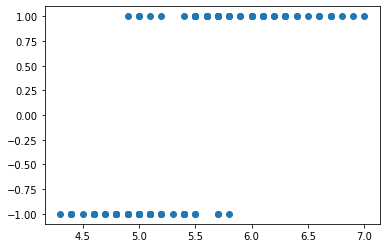

In [26]:
plt.scatter(X[:, 0], y)

## Combines the dataset and Shuffle them using numpy

In [33]:
dataset=np.c_[X, y]
np.random.seed(3)
np.random.shuffle(dataset)
dataset


array([[ 5. ,  2.3,  3.3,  1. ,  1. ],
       [ 5.8,  2.7,  4.1,  1. ,  1. ],
       [ 4.6,  3.4,  1.4,  0.3, -1. ],
       [ 5.6,  2.9,  3.6,  1.3,  1. ],
       [ 5.7,  2.9,  4.2,  1.3,  1. ],
       [ 6. ,  2.7,  5.1,  1.6,  1. ],
       [ 5.1,  2.5,  3. ,  1.1,  1. ],
       [ 4.4,  3.2,  1.3,  0.2, -1. ],
       [ 5. ,  3. ,  1.6,  0.2, -1. ],
       [ 5.7,  4.4,  1.5,  0.4, -1. ],
       [ 6.7,  3. ,  5. ,  1.7,  1. ],
       [ 4.9,  3.1,  1.5,  0.1, -1. ],
       [ 6.1,  2.8,  4. ,  1.3,  1. ],
       [ 6.2,  2.9,  4.3,  1.3,  1. ],
       [ 4.9,  3.1,  1.5,  0.2, -1. ],
       [ 6.6,  3. ,  4.4,  1.4,  1. ],
       [ 5.8,  2.7,  3.9,  1.2,  1. ],
       [ 5.1,  3.3,  1.7,  0.5, -1. ],
       [ 5.2,  2.7,  3.9,  1.4,  1. ],
       [ 4.8,  3. ,  1.4,  0.3, -1. ],
       [ 6.1,  2.8,  4.7,  1.2,  1. ],
       [ 4.8,  3. ,  1.4,  0.1, -1. ],
       [ 4.4,  2.9,  1.4,  0.2, -1. ],
       [ 5. ,  3.6,  1.4,  0.2, -1. ],
       [ 5.7,  2.6,  3.5,  1. ,  1. ],
       [ 6.7,  3.1,  4.7,

## Split the data into (X_train, Y_train), (X_test, Y_test):  80% for training and 20% for test

In [37]:
#########
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
#or 
# p=0.8 #percentage 80%
# split=int(len(dataset)*p)
# X_train=dataset[:split,:-1]
# X_test=dataset[split:,:-1]
# Y_train=dataset[:split, -1]
# Y_test=dataset[split:,-1]
###########

In [35]:
print(X_train.shape)

(80, 4)


In [36]:
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80,)
(20, 4)
(20,)


## Implement the class Perceptron

$ŷ[i] = Θ^TX[i]$

if  $y[i]*np.sign(ŷ[i]) <= 0$:

        update Θ: Θ = Θ + y[i]*X[i]
else:

      Θ = Θ

## For prediction: 

np.sign(X @ Θ)

In [161]:
class perceptron:
    """class that implements the perceptron"""
    eps = 1e-2
    def __init__(self, X, Y,theta, iter_= 100):
        self.X = X
        self.Y = Y
        self.iter_ = iter_
        self.theta = theta
        #self.y_hat={}
        
    def train(self):
        #loop over the number of iteration and the number of example
        for epoch in range(self.iter_):
          for i in range(self.X.shape[0]):            
            self.y_hat=self.theta.T@self.X[i]
            if self.Y[i]*np.sign(self.y_hat)<=0: self.theta=self.theta+self.Y[i]*self.X[i]
            else:self.theta=self.theta
        # compute the output of the model and update theta if necessary
    
    def predic(self,X):
      return np.sign(X@self.theta)
      
    
    def accuracy(self,X,Y):
        return "{} %".format((np.sum(Y==self.predic(X))/X.shape[0])*100)
        
            

In [162]:
perceptron = perceptron(X_train,Y_train,np.random.rand(4)*1e-4)

In [163]:
perceptron.train()

In [164]:
perceptron.predic(X_test)

array([ 1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,
        1., -1.,  1., -1.,  1., -1., -1.])

In [165]:
perceptron.accuracy(X_test, Y_test)

'100.0 %'

In [ ]:
#np.sum(Y_test==Perc.predic(X_test))

20